# Time Series Seasonal Analysis
Breaking down different datasets into their key components as variables which make up the movements in the data can be used to understand how sales change over specific time periods. 

## Monthly Car Sales
Look at the monthly car sales

### Import Packages

In [1]:
#Import necessary packages and set options for jupyter notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
from itertools import product
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pmdarima import auto_arima
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX

### Data Plotting

In [2]:
#Create a function for line time series
def line_series(x,y,title,xlabel,ylabel):
    plt.figure(figsize=(12,8))
    plt.plot(x,y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [3]:
#Create a function for rolling average values
def rolling_average(x,y,title,xlabel,ylabel,window):
    plt.figure(figsize=(12,8))
    rolmean = y.rolling(window).mean()
    plt.plot(x,y)
    plt.plot(x,rolmean,linestyle='-')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [43]:
#Create a function for a least squares line

#Import the neccessary packages
from sklearn.linear_model import LinearRegression

def least_squares_line(incrementing_value,y_value,title,xlabel,ylabel):
    plt.figure(figsize=(12,8))

    #Create the x and y values for the least squares lines
    x_trend_least_squares = incrementing_value.values.reshape(-1,1).astype(float)
    y_trend_least_squares = y_value.astype(float) 

    #Train the model using linear regression packagage
    model = LinearRegression()

    #Fit the model to the x and y values
    model.fit(x_trend_least_squares,y_trend_least_squares)

    #Create the y values for the least squares
    y_pred = model.predict(x_trend_least_squares)

    plt.scatter(x_trend_least_squares, y_trend_least_squares, label='original data', color='blue')
    plt.plot(x_trend_least_squares, y_pred, label='least squares', color='red')

    plt.legend()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

    #Get the slope (coefficient) and intercept
    slope = model.coef_[0]
    intercept = model.intercept_

    return slope, intercept

In [4]:
#Create a function that focuses on a specific time period
#This can help create a deeper understanding of how data values change on a regular pattern
def data_period(df,x,y,time_period1,time_period2): 
    index_1 = df[x == time_period1].index[0]
    index_2 = df[x == time_period2].index[0]
    y_time_period = y.iloc[index_1:index_2]
    return y_time_period

### Seasonal Decomposition

In [6]:
def additive_seasonal_decomposition(data, period):
    
    decomposition = seasonal_decompose(data, model='additive', period=period)

    # Decomposed components
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    return trend, seasonal, residual


In [7]:
def plot_additive_seasonal_decomposition(data, period):

    decomposition = seasonal_decompose(data, model='additive', period=period)

    # Decomposed components
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    # Create subplots
    plt.figure(figsize=(10, 8))

    # Plot the original data
    plt.subplot(411)
    plt.plot(data, label='Original')
    plt.legend()

    # Plot the trend
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend()

    # Plot the seasonal
    plt.subplot(413)
    plt.plot(seasonal, label='Seasonal')
    plt.legend()

    # Plot the residual
    plt.subplot(414)
    plt.plot(residual, label='Residual')
    plt.legend()

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

In [ ]:
#Import the data from the 'combined_tables' using 'monthly_car_sales_all_data.csv'
monthly_sales = pd.read_csv('/Users/ben_nicholson/Visual_Code_Projects/Personal_Projects/Maryland Car Sales Data/maryland_economics_database/combined_tables/monthly_car_sales_all_data.csv')
monthly_sales['month'] = pd.to_datetime(monthly_sales['month'])

### Total Car Sales Seasonal Analysis

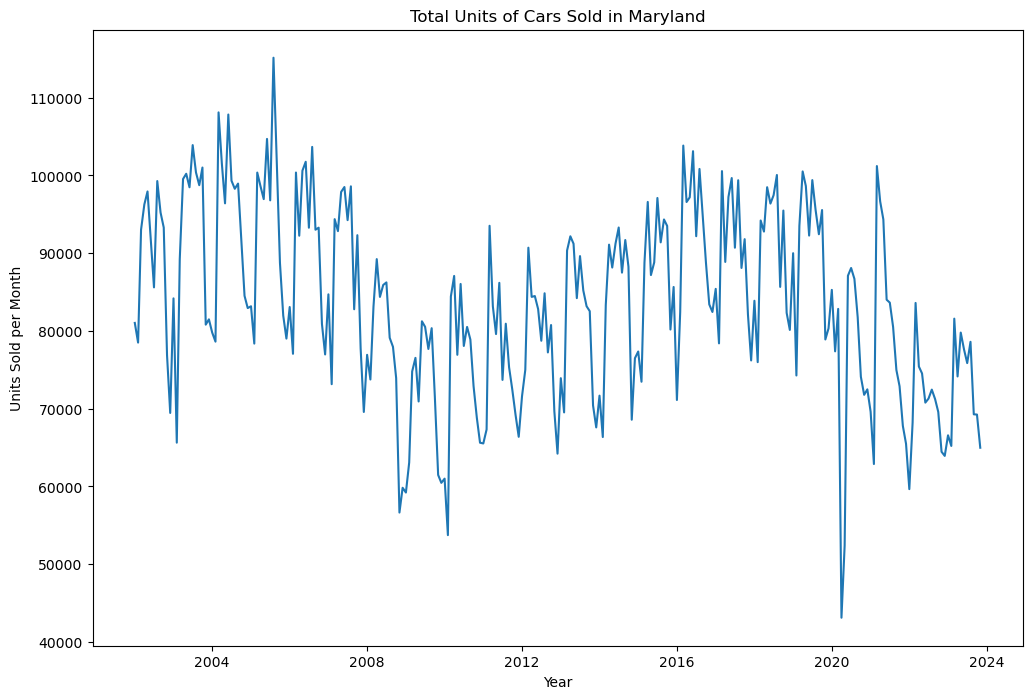

In [8]:
#Plot the total car sales data
line_series(monthly_sales['month'],monthly_sales['total_cars_sold'],'Total Units of Cars Sold in Maryland','Year','Units Sold per Month')

The graph shows
- Seasonality: Repeating pattern 
- Trend: Downwards trend in the number of cars
- Cycle: Overall movement in the data on 4 different occasions 
- Irregularity: Events such as Covid-19 Pandemic in 2020 

#### Seasonality Understanding
Break down the movements in the data on a seasonal period
1. Determine Seasonal Period: There are 2 main ways of looking into the seasonal period. This is by visualising the data and statistically analysing the data. Both of these methods can help determine regular patterns that take place over the total cars sold 

2. Seasonal Decomposition: Graph the different components that make up seasonal values

##### Determine Seasonal Period
1. Zoom into a year to observe season values
2. Look at ACF to observe moving average

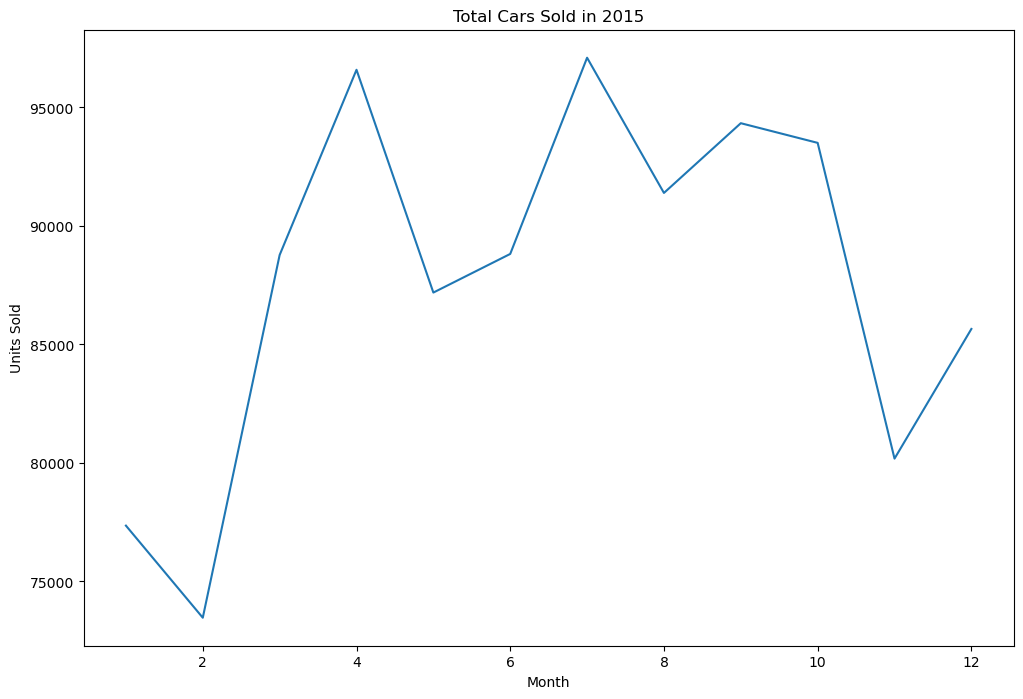

In [19]:
#Look at year 2015 as this is not during a period of obscure movements in the overall data
#Create series of these values and then plot them

#2015 total cars sold
time_period_2015 = data_period(monthly_sales,monthly_sales['month'],monthly_sales['total_cars_sold'],'2015-01-01','2016-01-01')
line_series(range(1,len(time_period_2015)+1),time_period_2015.values,'Total Cars Sold in 2015','Month','Units Sold')

Visualising a calendar year to observe if there is a similar pattern
- Month 2 (February) had the lowest values
- Middle of the year had the highest values

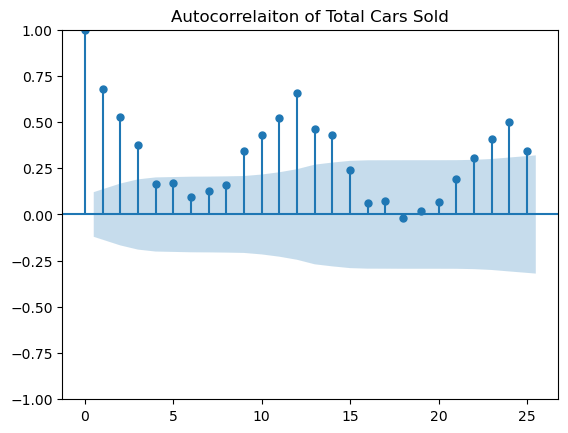

In [10]:
#ACF plot for monthly car sales
acf_monthly_car_sales = plot_acf(monthly_sales['total_cars_sold'],title='Autocorrelaiton of Total Cars Sold')

The ACF plot show a clear moving average where the lags at increments of k = 12 show a high correlation. This suggests that there is a seasonal period of 12, which would mean a year.

#### Define Seasonal Values as Parameters

In [20]:
#Create variables 
trend_monthly_car_sales = additive_seasonal_decomposition(monthly_sales['total_cars_sold'],12)[0]
seasonality_monthly_car_sales = additive_seasonal_decomposition(monthly_sales['total_cars_sold'],12)[1]
residual_monthly_car_sales = additive_seasonal_decomposition(monthly_sales['total_cars_sold'],12)[2]

#### Plot Seasonal Decomposition

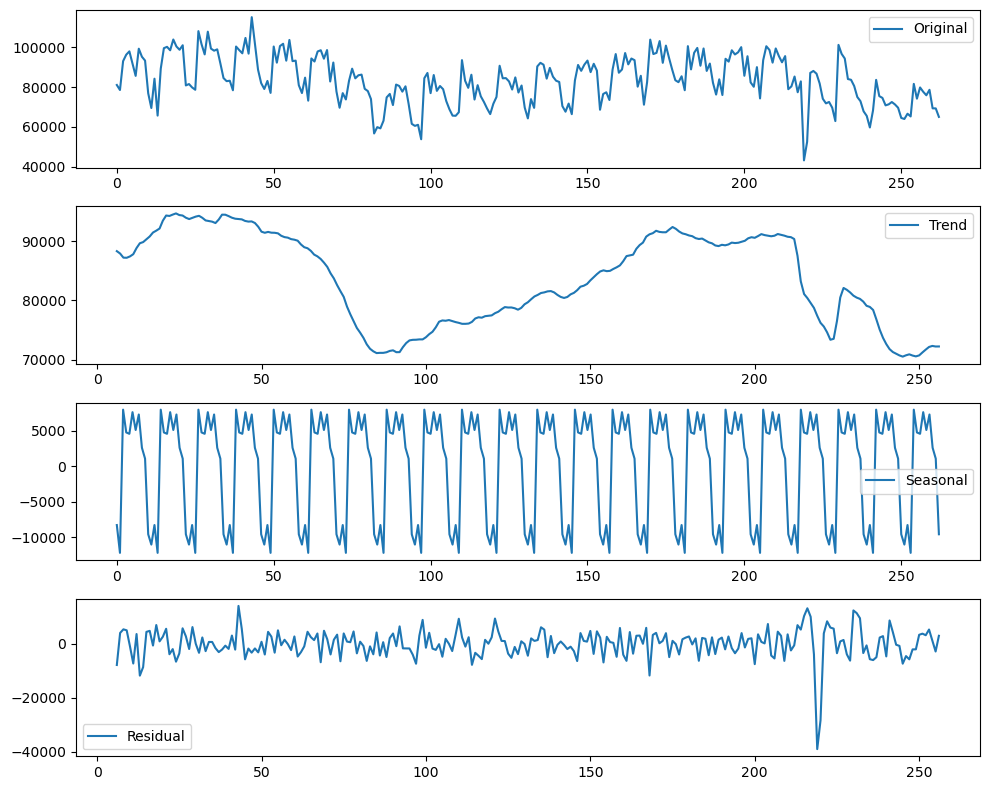

In [13]:
#Plot the total cars sold data seasonal decomposition
plot_additive_seasonal_decomposition(monthly_sales['total_cars_sold'],12)

- Cycle: The decomposition shows the movements in total cars sold
- Trend: There is a decrease in the number of cars sold
- Seasonality: There is a seasonal period
- Residual: Values in 2020 show a very sharp decrease compared to the rest of the data, the rest seems to have removed a lot of patterns taking place

#### Trend Understanding
There seems to be an overall downard trend in the movement of data values. Look at the least square lines on top of the original data to see how it moves.

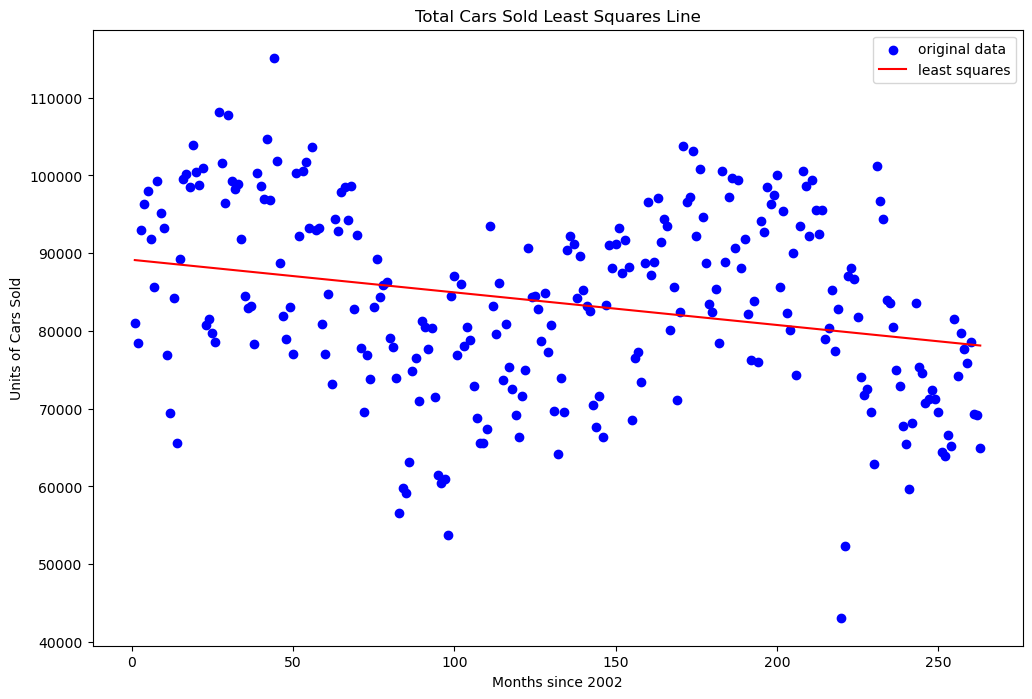

(-41.945386732386424, 89155.63135285751)

In [44]:
#Plot the least squaresl line for total cars sold
least_squares_line(monthly_sales['Incrementing Month'],monthly_sales['total_cars_sold'],'Total Cars Sold Least Squares Line','Months since 2002','Units of Cars Sold')

The unit cars sold per month is decreasing by about 42 cars a month with a starting value of 89,156 cars.

#### Cyclical Movements

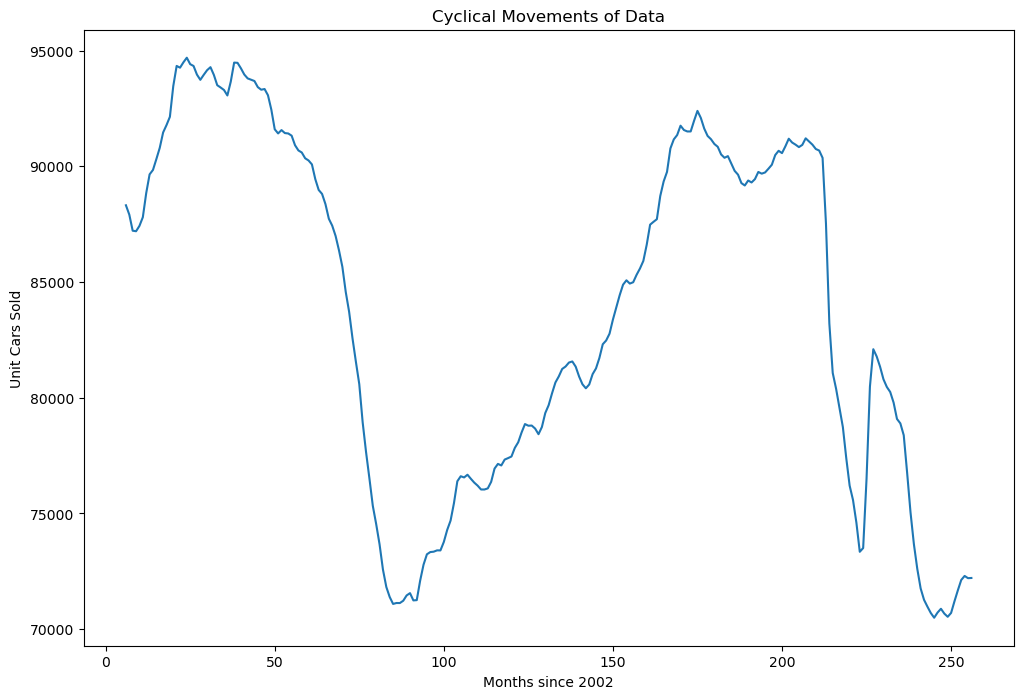

In [47]:
#Map the cyclical component of the data
line_series(trend_monthly_car_sales.index,trend_monthly_car_sales.values,'Cyclical Movements of Data','Months since 2002','Unit Cars Sold')

#### Seasonal Period

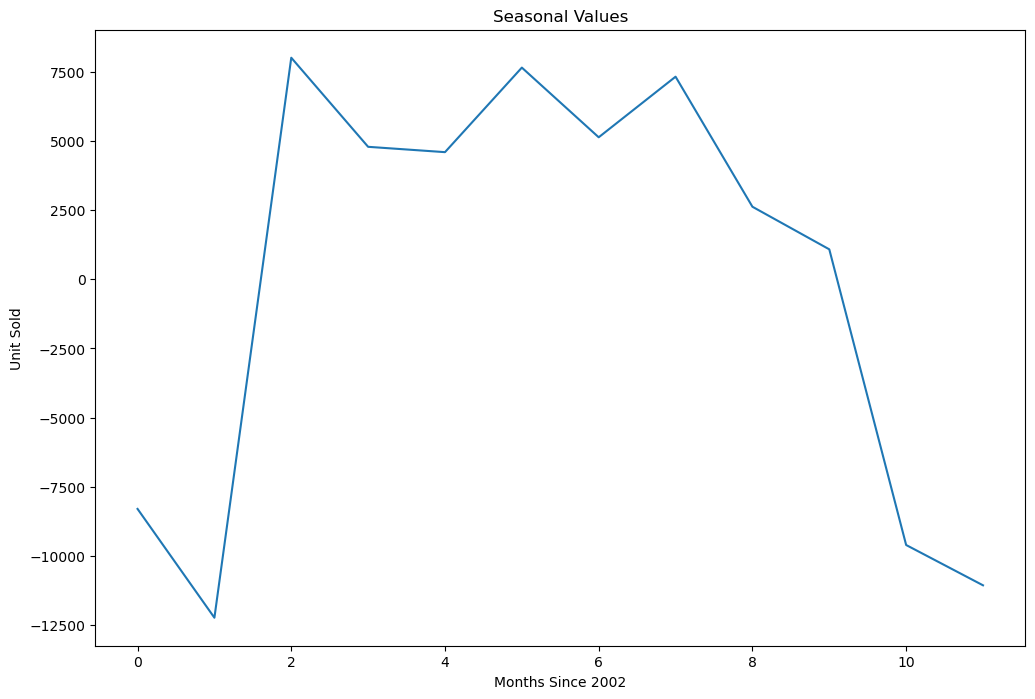

In [54]:
#Create a line series of one period of seaonal values 
line_series(seasonality_monthly_car_sales.index[0:12],seasonality_monthly_car_sales.values[0:12],'Seasonal Values','Months Since 2002','Unit Sold')

You can see that there is a pattern that takes place for sales throughout the year. January, February, November and December all have much lower than average values. Car Sales are much higher from March-October during a given year.

#### Residual

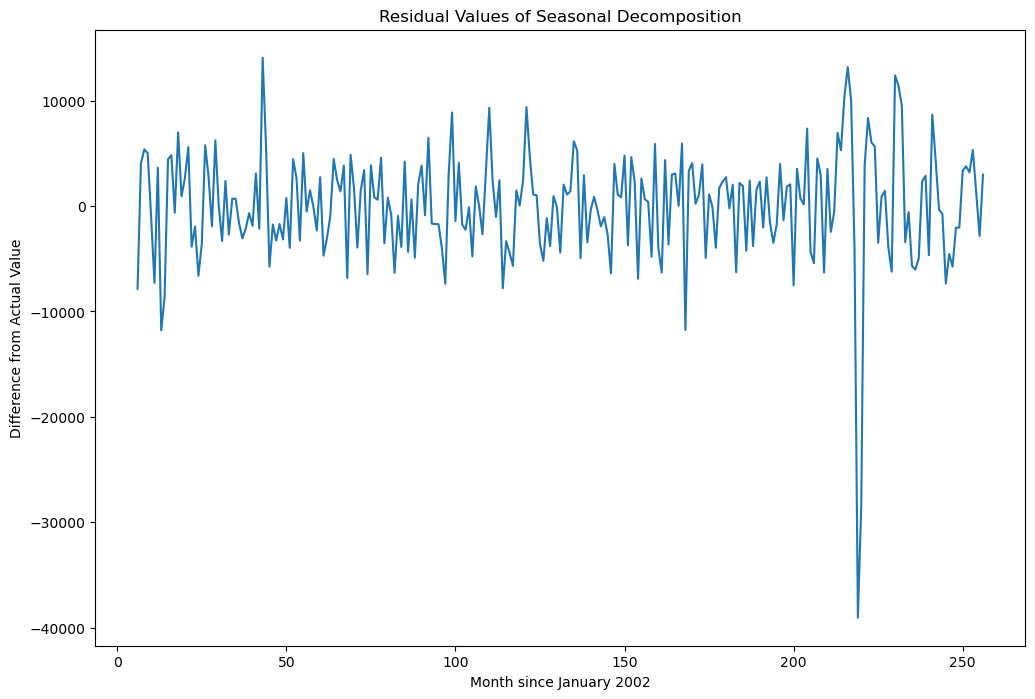

In [63]:
#Drop the na values
residual_monthly_car_sales.dropna(inplace=True)

#Plot the graph
line_series(residual_monthly_car_sales.index,residual_monthly_car_sales.values,'Residual Values of Seasonal Decomposition','Month since January 2002','Difference from Actual Value')

Observe that there is no real pattern to the residual so the seasonality has been digested however there is a large residual value that due to the Covid-19 Pandemic lead to the number of cars sold in Maryland to drop dramatically.

#### Model Evaluation

In [64]:
#Mean Absolute Error

#Make a series of 0's based on the length of the residuals
zeros = np.zeros(len(residual_monthly_car_sales))

#Compare the residual values with the monthly car sales
mean_absolute_error(residual_monthly_car_sales,zeros)

3830.6683006070957

#### Plot model vs actual data

In [65]:
monthly_sales

,new_cars_sold,used_cars_sold,values_new_cars_sold,value_used_cars_sold,month,total_cars_sold,total_value_cars_sold,inflation_rate_cpi,unemployment_rate_not_sa,unemployment_rate_sa,Incrementing Month
0,31106,49927,755015820,386481929,2002-01-01,81033,1141497749,2.6,5.5,5.0,1
1,27520,50982,664454223,361353242,2002-02-01,78502,1025807465,2.6,5.2,5.0,2
2,34225,58794,805666244,419385387,2002-03-01,93019,1225051631,2.4,5.1,5.0,3
3,36452,59817,846368297,433061150,2002-04-01,96269,1279429447,2.5,4.9,4.9,4
4,37359,60577,855005784,442569410,2002-05-01,97936,1297575194,2.5,4.7,4.9,5
...,...,...,...,...,...,...,...,...,...,...,...
258,26360,49502,1196918451,887723892,2023-07-01,75862,2084642343,4.7,1.7,1.8,259
259,25876,52725,1222581892,908454060,2023-08-01,78601,2131035952,4.3,1.8,1.7,260
260,23892,45386,1134437699,744676584,2023-09-01,69278,1879114283,4.1,1.8,1.6,261
261,23775,45473,1122680147,740582533,2023-10-01,69248,1863262680,4.0,2.1,1.7,262


#### Forecasting
- Trend: Slope and trend has been identified
- Cyclical: Need to create some understanding of the cyclical changes
- Seasonal: Good understanding of which months have which values on average
- Residual: There is a 